In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Wholesale_customers_data.csv')

In [3]:
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [5]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:

#Standarize the data: 

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)


In [8]:
df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [45]:
# Initialize KMeans with 3 clusters
km = KMeans(n_clusters=3)

# Fit KMeans to the data and predict cluster labels
df_scaled['cluster'] = km.fit_predict(df_scaled)

/Users/Govind/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0


In [47]:
cluster_counts = df_scaled['cluster'].value_counts()
print(cluster_counts)


cluster
1    296
0    130
2     14
Name: count, dtype: int64


In [9]:
# Initialize an empty list to store distances
dist_df = []

# Loop through different numbers of clusters
for num_clusters in range(1, 11):
    km = KMeans(n_clusters=num_clusters)
    km.fit(df_scaled)
    dist_df.append([num_clusters, km.inertia_])

# Create a DataFrame from the list of distances
dist_df = pd.DataFrame(dist_df, columns=['NumberOfCluster', 'Distance'])
dist_df

/Users/Govind/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Govind/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Govind/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Govind/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

,NumberOfCluster,Distance
0,1,3520.000000
1,2,2599.384424
2,3,2149.283956
3,4,1847.399351
4,5,1564.999120
5,6,1313.961987
6,7,1173.236314
7,8,1056.952304
8,9,988.386490
9,10,913.353684


Text(0.5, 1.0, 'K-Means Elbow Method')

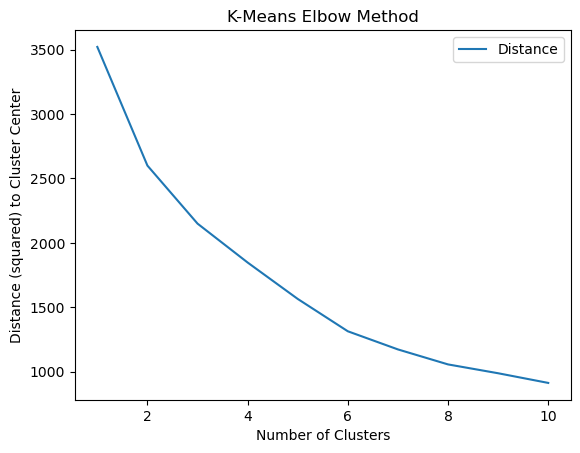

In [10]:
# Set the index of the DataFrame to 'number_of_clusters' and plot
dist_df.set_index("NumberOfCluster").plot()

# Set labels and title
plt.xlabel("Number of Clusters")
plt.ylabel("Distance (squared) to Cluster Center")
plt.title("K-Means Elbow Method")

# Show the plot
#plt.show()

In [95]:
# Set the index of the DataFrame to 'number_of_clusters' and plot
dist_df.set_index("NumberOfCluster").plot()

# Set labels and title
plt.xlabel("Number of Clusters")
plt.ylabel("Distance (squared) to Cluster Center")
plt.title("K-Means Elbow Method")

# Show the plot
#plt.show()

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'K-Means Elbow Method')

In [71]:
# As we can see the optimum number of clusters is 6

/Users/Govind/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


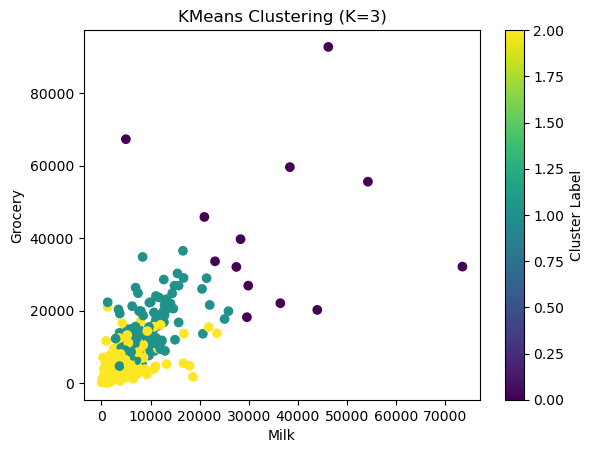

In [13]:
 #Set the number of clusters = 3
k = 3

# Initialize KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=k)

# Fit KMeans to the scaled data
kmeans.fit(df_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

# Scatter plot of the data points
plt.scatter(df['Milk'], df['Grocery'], c=df['cluster_label'], cmap='viridis')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('KMeans Clustering (K=3)')
plt.colorbar(label='Cluster Label')
plt.show()


/Users/Govind/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


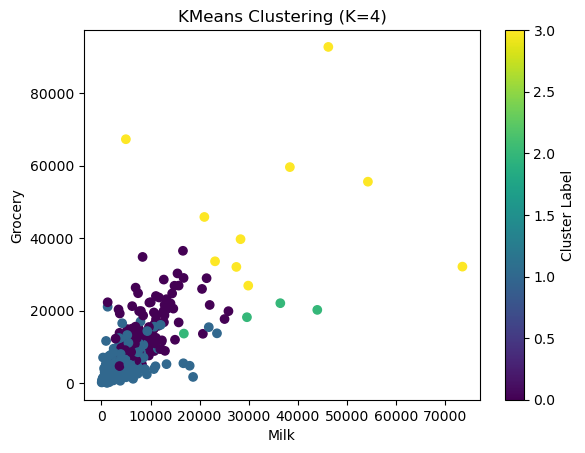

In [54]:
 #Set the number of clusters = 4
k = 4

# Initialize KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=k)

# Fit KMeans to the scaled data
kmeans.fit(df_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

# Scatter plot of the data points
plt.scatter(df['Milk'], df['Grocery'], c=df['cluster_label'], cmap='viridis')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('KMeans Clustering (K=4)')
plt.colorbar(label='Cluster Label')
plt.show()


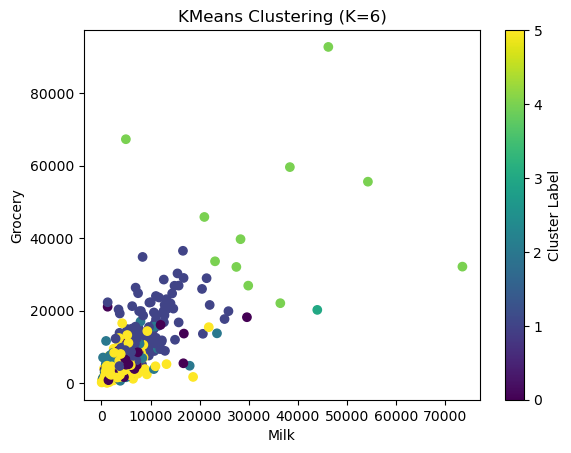

In [75]:
 #Set the number of clusters = 6
k = 6

# Initialize KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=k)

# Fit KMeans to the scaled data
kmeans.fit(df_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

# Scatter plot of the data points
plt.scatter(df['Milk'], df['Grocery'], c=df['cluster_label'], cmap='viridis')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('KMeans Clustering (K=6)')
plt.colorbar(label='Cluster Label')
plt.show()


In [89]:
km = KMeans(n_clusters=6)
km.fit(df_scaled)

pred = km.predict(df_scaled)
df['cluster'] = pred
print('\nCount in each cluster: \n', df['cluster'].value_counts())


Count in each cluster: 
 cluster
1    172
2    125
0     86
5     46
3     10
4      1
Name: count, dtype: int64


/Users/Govind/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
